In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# For Data extraction
from sklearn.model_selection import train_test_split

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from statsmodels.graphics.mosaicplot import mosaic
import missingno as msno
from scipy.stats import skewnorm

#Common model helpers
from sklearn import impute, metrics, model_selection, neighbors, preprocessing, tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data Extraction

In [3]:
#Reading the csv file in variable 
df_stroke = pd.read_csv('/content/drive/MyDrive/data_sets/healthcare-dataset-stroke-data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#get the size of dataframe
df_stroke.shape

(5110, 12)

##Initial data checking

In [5]:

df_stroke.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [6]:
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Data Splitting: Train, Test and Validate Split


In [7]:
from copy import deepcopy

stroke_X_intermediate, stroke_X_test, stroke_Y_intermediate, stroke_Y_test =  \
  model_selection.train_test_split(df_stroke.drop(labels=["stroke"], axis='columns'), 
                                   df_stroke["stroke"],test_size=0.10, random_state=42)


In [8]:
stroke_X_train, stroke_X_validate, stroke_Y_train, stroke_Y_validate =  \
  model_selection.train_test_split(stroke_X_intermediate, stroke_Y_intermediate, test_size=0.1, random_state=42)
  

df_stroke_train = deepcopy(stroke_X_train)
df_stroke_train["stroke"] = stroke_Y_train

df_stroke_validate = deepcopy(stroke_X_validate)
df_stroke_validate["stroke"] = stroke_Y_validate

df_stroke_test = deepcopy(stroke_X_test)
df_stroke_test["stroke"] = stroke_Y_test


In [9]:
stroke_X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1108,56734,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown
3684,25676,Female,7.0,0,0,No,children,Rural,89.38,19.0,Unknown
3419,39017,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked
3443,2730,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked
31,33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown


In [10]:
stroke_X_train.shape

(4139, 11)

In [11]:
df_stroke_train.shape

(4139, 12)

In [12]:
stroke_X_test.shape

(511, 11)

In [13]:
df_stroke_test.shape

(511, 12)

In [14]:
stroke_X_validate.shape

(460, 11)

In [15]:
df_stroke_validate.shape

(460, 12)

## Exploratory Data Analysis

####Univariate Analysing the target variables

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


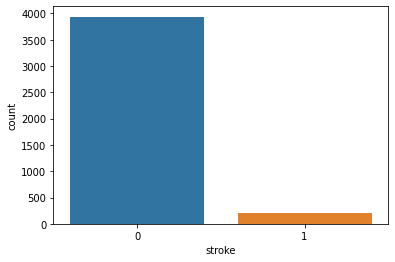

In [16]:
sns.countplot(df_stroke_train['stroke'])

####Univariate Analysing the feature variables

In [17]:
df_stroke_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


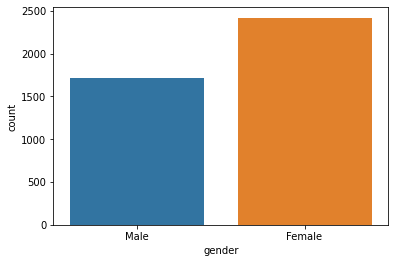

In [18]:
sns.countplot(df_stroke_train['gender'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


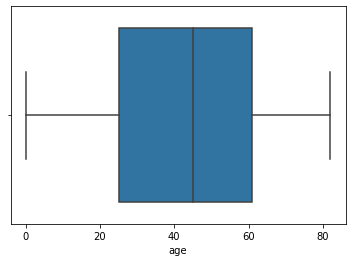

In [19]:
sns.boxplot(df_stroke_train['age'])

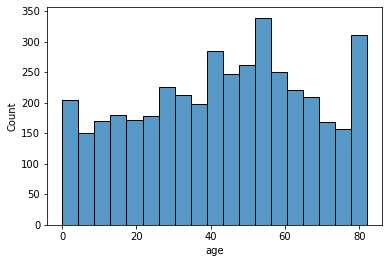

In [20]:
sns.histplot(df_stroke_train['age'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


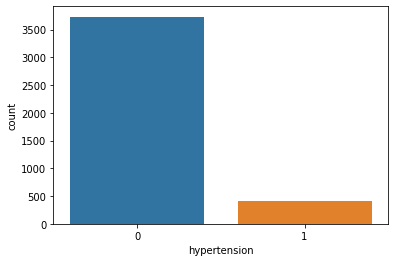

In [21]:
sns.countplot(df_stroke_train['hypertension'])

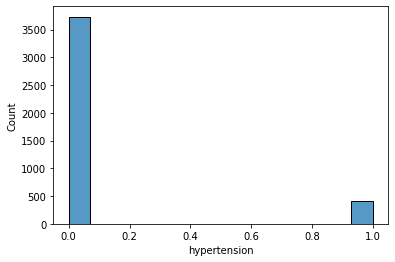

In [22]:
sns.histplot(df_stroke_train['hypertension'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


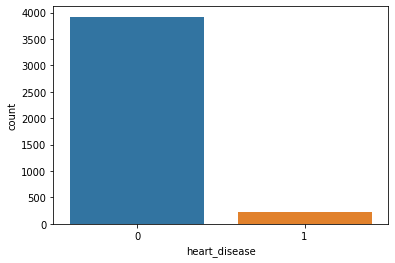

In [23]:
sns.countplot(df_stroke_train['heart_disease'])

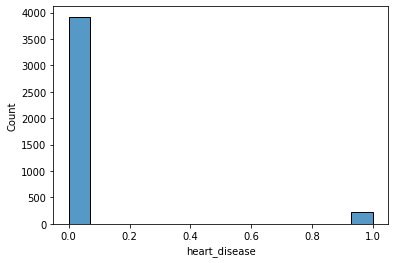

In [24]:
sns.histplot(df_stroke_train['heart_disease'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


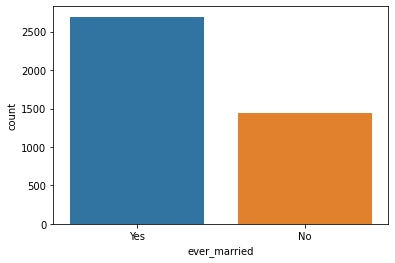

In [25]:
sns.countplot(df_stroke_train['ever_married'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


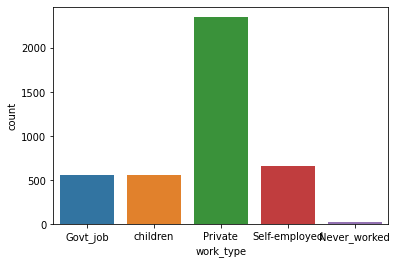

In [26]:
sns.countplot(df_stroke_train['work_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


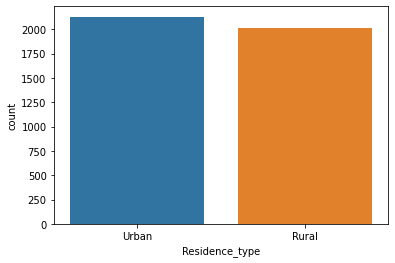

In [27]:
sns.countplot(df_stroke_train['Residence_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


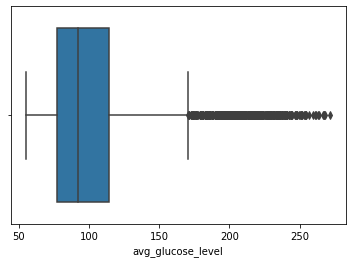

In [28]:
sns.boxplot(df_stroke_train['avg_glucose_level'])
#the outliers can be the true values in avg_glucose_level.

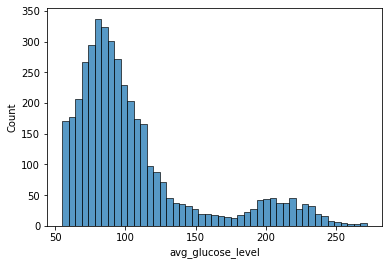

In [29]:
sns.histplot(df_stroke_train['avg_glucose_level'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


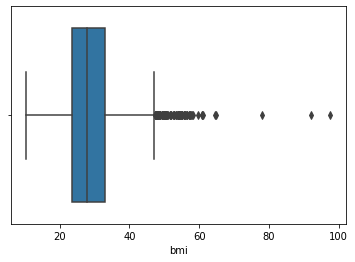

In [30]:
sns.boxplot(df_stroke_train['bmi'])

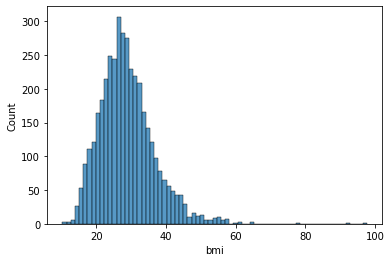

In [31]:
sns.histplot(df_stroke_train['bmi'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


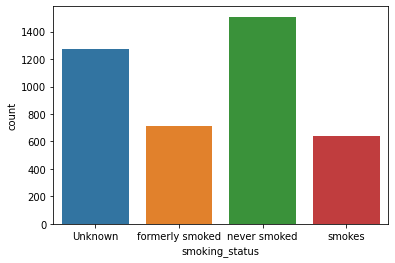

In [32]:
sns.countplot(df_stroke_train['smoking_status'])

####Multivarite Analysis of the relationship between feature and target variables

#####Do female or male have more stroke?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


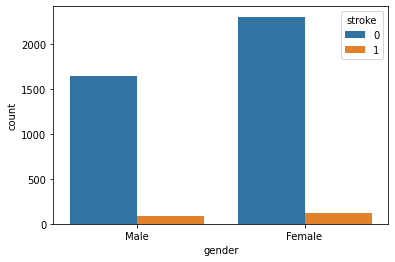

In [33]:
sns.countplot(df_stroke_train["gender"], hue=df_stroke_train["stroke"])

#####Which age group of people are more likely to get stroke?

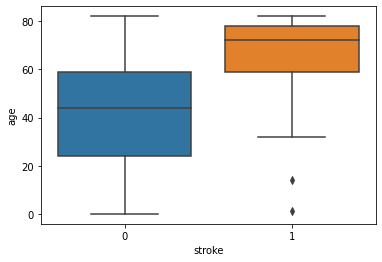

In [34]:
sns.boxplot(data=df_stroke_train, x="stroke", y="age")

#####How does hypertension influence the likelihood of getting a stroke?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


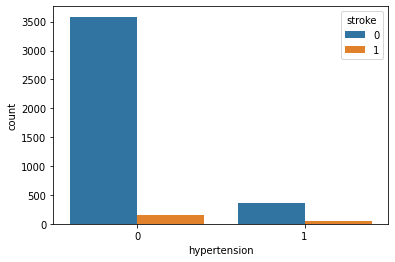

In [35]:
sns.countplot(df_stroke_train["hypertension"], hue=df_stroke_train["stroke"])

#####Do subjects previously diagnosed heart disease have higher risk of getting a stroke?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


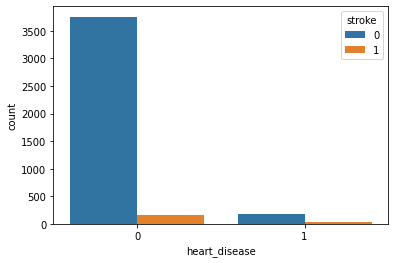

In [36]:
sns.countplot(df_stroke_train["heart_disease"], hue=df_stroke_train["stroke"])

#####Do married subjects have higher risk of getting a stroke?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


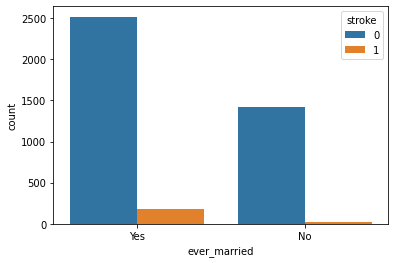

In [37]:
sns.countplot(df_stroke_train["ever_married"], hue=df_stroke_train["stroke"])

#####Which work type has higher risk of getting a stroke?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


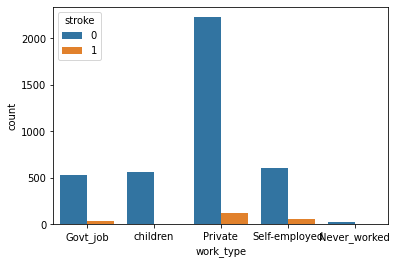

In [38]:
sns.countplot(df_stroke_train["work_type"], hue=df_stroke_train["stroke"])

##### Which residence type has higher risk of getting stroke?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


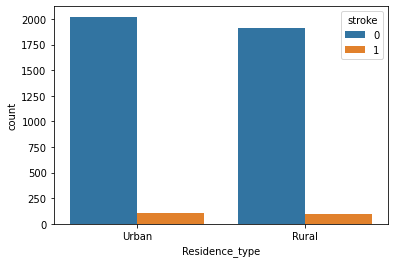

In [39]:
sns.countplot(df_stroke_train["Residence_type"], hue=df_stroke_train["stroke"])

#####Do subjects with higher average glucose level have higher risk of getting a stroke?

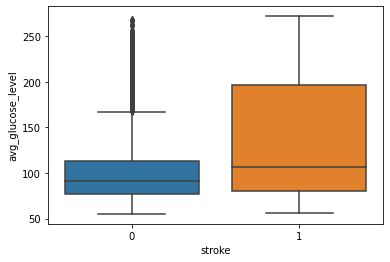

In [40]:
sns.boxplot(data=df_stroke_train, x="stroke", y="avg_glucose_level")

#####Does bmi have impact on the risk of getting a stroke?

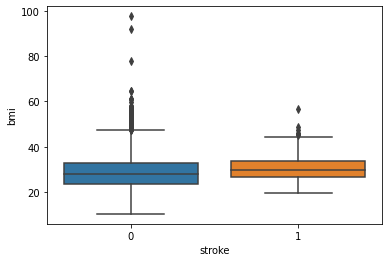

In [41]:
sns.boxplot(data=df_stroke_train, x="stroke", y="bmi")

#####Does smoking increase the likelihood of getting a stroke?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


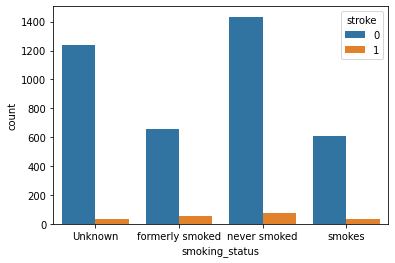

In [42]:
sns.countplot(df_stroke_train["smoking_status"], hue=df_stroke_train["stroke"])

###Analysis of the relationship between feature and feature variables

In [43]:
features_corr_check= ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

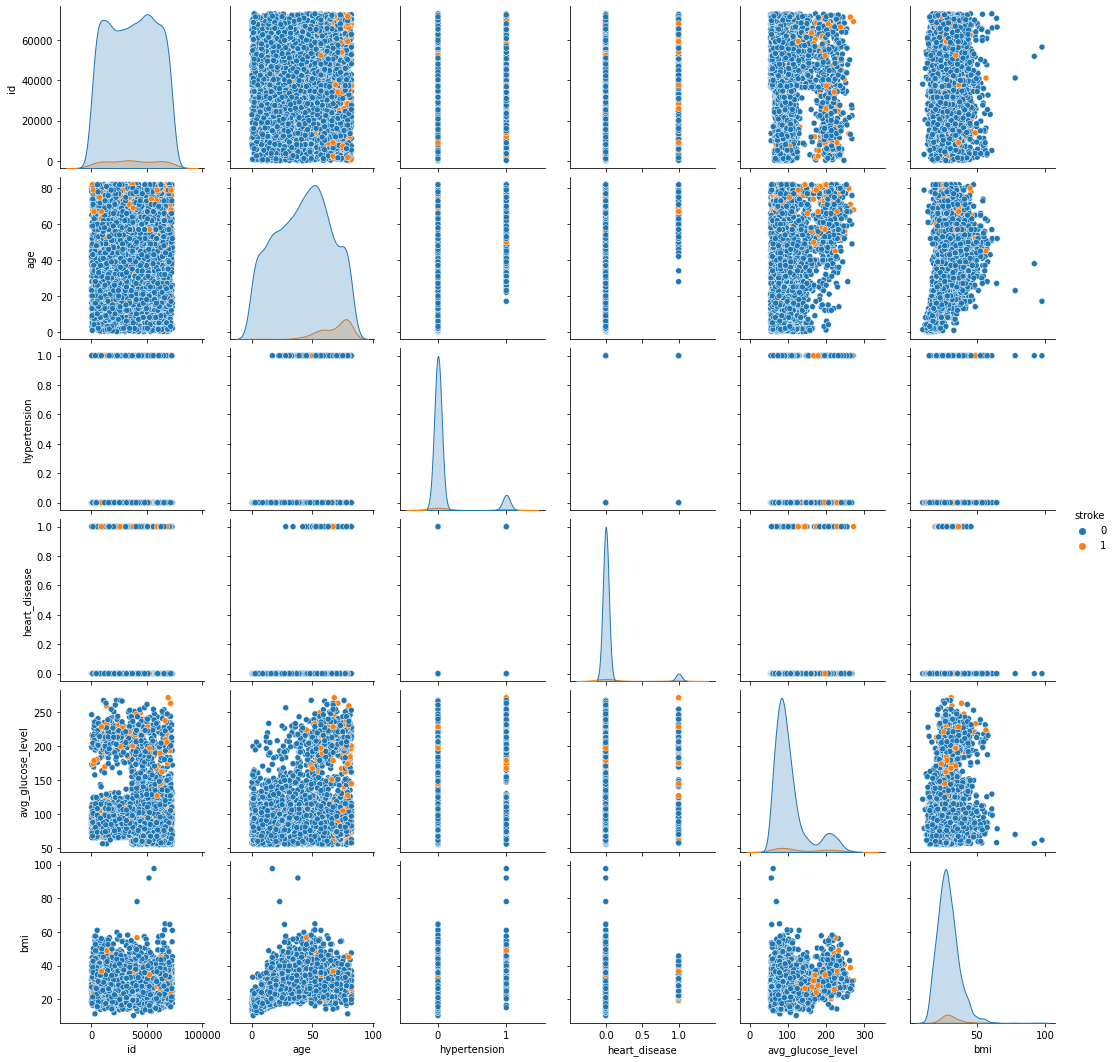

In [44]:
sns.pairplot(df_stroke_train, hue='stroke')

In [45]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = df_stroke_train.select_dtypes(include=numerics).columns
num_cols

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [46]:
df_stroke_train_corr = df_stroke_train.corr(method='pearson')
df_stroke_train_corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.002866,-0.003324,-0.006820,-0.007898,0.007094,0.005913
age,-0.002866,1.000000,0.275350,0.264527,0.241258,0.329668,0.244147
hypertension,-0.003324,0.275350,1.000000,0.110112,0.182588,0.172786,0.132676
heart_disease,-0.006820,0.264527,0.110112,1.000000,0.160357,0.034347,0.132379
avg_glucose_level,-0.007898,0.241258,0.182588,0.160357,1.000000,0.176462,0.135428
bmi,0.007094,0.329668,0.172786,0.034347,0.176462,1.000000,0.044284
stroke,0.005913,0.244147,0.132676,0.132379,0.135428,0.044284,1.000000


In [47]:
df_stroke_train_corr = df_stroke_train.corr(method='kendall')
df_stroke_train_corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.001664,-0.002713,-0.005518,-0.037910,0.005774,0.004807
age,-0.001664,1.000000,0.229976,0.221804,0.099439,0.253202,0.203947
hypertension,-0.002713,0.229976,1.000000,0.110112,0.097618,0.136024,0.132676
heart_disease,-0.005518,0.221804,0.110112,1.000000,0.085327,0.049059,0.132379
avg_glucose_level,-0.037910,0.099439,0.097618,0.085327,1.000000,0.076199,0.070062
bmi,0.005774,0.253202,0.136024,0.049059,0.076199,1.000000,0.047909
stroke,0.004807,0.203947,0.132676,0.132379,0.070062,0.047909,1.000000


In [48]:
df_stroke_train_corr = df_stroke_train.corr(method='spearman')
df_stroke_train_corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.002314,-0.003323,-0.006758,-0.057682,0.008476,0.005886
age,-0.002314,1.000000,0.279912,0.269966,0.147486,0.373010,0.248231
hypertension,-0.003323,0.279912,1.000000,0.110112,0.119536,0.166245,0.132676
heart_disease,-0.006758,0.269966,0.110112,1.000000,0.104486,0.059959,0.132379
avg_glucose_level,-0.057682,0.147486,0.119536,0.104486,1.000000,0.113964,0.085793
bmi,0.008476,0.373010,0.166245,0.059959,0.113964,1.000000,0.058553
stroke,0.005886,0.248231,0.132676,0.132379,0.085793,0.058553,1.000000


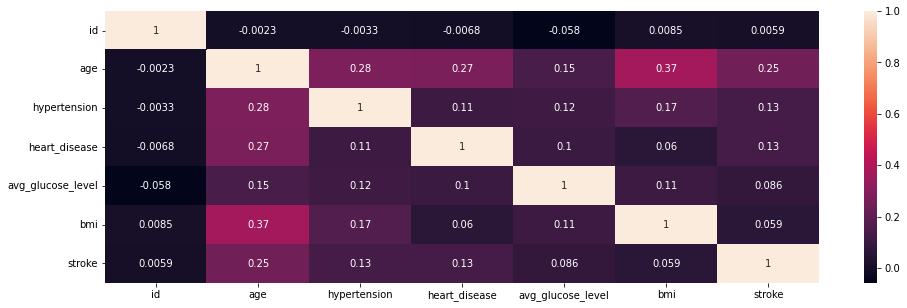

In [49]:
plt.figure(figsize = (16,5))
sns.heatmap(df_stroke_train_corr,annot=True)

##Pre-processing for training

In [50]:
df_stroke_train = df_stroke_train.drop("id",axis=1)

####Encoding of nominal / categorical features

In [51]:
def create_dummies(df, column_name,drop_first=False):
  # Get the binary encodings for the columns
  temp_dummies = pd.get_dummies(df[column_name],drop_first=drop_first)
  temp_df = df.drop(labels=[column_name], axis='columns')
  return temp_df.join(temp_dummies)

In [52]:
df_stroke['gender']

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

In [53]:
df_stroke_train = create_dummies(df_stroke_train, 'gender')

In [54]:
df_stroke_train

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
1108,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown,0,0,1
3684,7.0,0,0,No,children,Rural,89.38,19.0,Unknown,0,1,0
3419,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0,1,0
3443,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0,0,1
31,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0,0,1
2492,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,Unknown,0,1,0
3625,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0,0,1
2136,27.0,0,0,Yes,Private,Urban,76.74,53.9,Unknown,0,1,0


In [55]:
df_stroke_train = create_dummies(df_stroke_train, 'work_type')

In [56]:
df_stroke_train = create_dummies(df_stroke_train, 'Residence_type')

In [57]:
df_stroke_train = create_dummies(df_stroke_train, 'smoking_status')

In [58]:
df_stroke_train = create_dummies(df_stroke_train, 'ever_married')
df_stroke_train.rename(columns= {"Yes" : "married"})
##df_stroke_train.rename(columns= {"No" : "Not married"})

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,married
1108,33.0,0,0,82.83,25.4,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [59]:
df_stroke_train.rename(columns= {"No" : "Not married"})

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,Not married,Yes
1108,33.0,0,0,82.83,25.4,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


####Dealing with Missing Data in the Training set

In [60]:
stroke_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4139 entries, 1108 to 3595
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4139 non-null   int64  
 1   gender             4139 non-null   object 
 2   age                4139 non-null   float64
 3   hypertension       4139 non-null   int64  
 4   heart_disease      4139 non-null   int64  
 5   ever_married       4139 non-null   object 
 6   work_type          4139 non-null   object 
 7   Residence_type     4139 non-null   object 
 8   avg_glucose_level  4139 non-null   float64
 9   bmi                3975 non-null   float64
 10  smoking_status     4139 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 517.1+ KB


In [61]:
stroke_X_train.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  164
smoking_status         0
dtype: int64

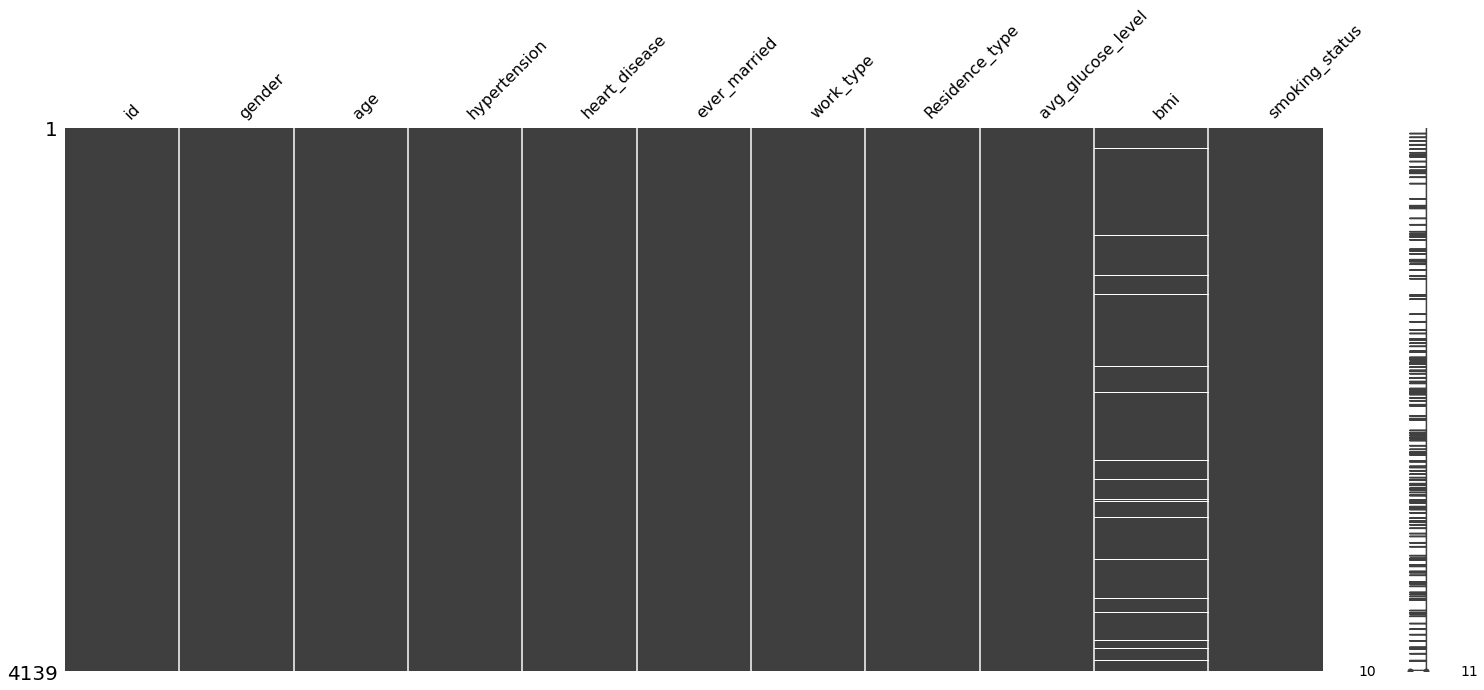

In [62]:
msno.matrix(stroke_X_train)

####Imputation for missing values

In [63]:
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
def impute_attribute(df, column, imputer=imputer):
  imputer = imputer.fit(df[[column]])
  return imputer.transform(df[[column]]), imputer

In [64]:
df_stroke_train['bmi'], bmi_imputer = impute_attribute(df_stroke_train,'bmi')
df_stroke_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
1108,33.0,0,0,82.83,25.4,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [65]:
df_stroke_train.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Female               0
Male                 0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
No                   0
Yes                  0
dtype: int64

##Model training

In [66]:
# Our features
stroke_X_train = df_stroke_train.drop(labels=["stroke"], axis=1)
# Our target
stroke_Y_train = df_stroke_train["stroke"]
stroke_X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
1108,33.0,0,0,82.83,25.4,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [67]:
df_stroke_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4139 entries, 1108 to 3595
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4139 non-null   float64
 1   hypertension       4139 non-null   int64  
 2   heart_disease      4139 non-null   int64  
 3   avg_glucose_level  4139 non-null   float64
 4   bmi                4139 non-null   float64
 5   stroke             4139 non-null   int64  
 6   Female             4139 non-null   uint8  
 7   Male               4139 non-null   uint8  
 8   Govt_job           4139 non-null   uint8  
 9   Never_worked       4139 non-null   uint8  
 10  Private            4139 non-null   uint8  
 11  Self-employed      4139 non-null   uint8  
 12  children           4139 non-null   uint8  
 13  Rural              4139 non-null   uint8  
 14  Urban              4139 non-null   uint8  
 15  Unknown            4139 non-null   uint8  
 16  formerly smoked    41

####Applying SMOTE (Synthetic Minority Oversampling Technique) to balance the data and check the accuracy score again : generating the representative samples to overcome the overfitting problem posed by random oversampling



In [68]:
from collections import Counter
print("Before OverSampling, counts of label '1': {}".format(sum(stroke_Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(stroke_Y_train==0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(stroke_X_train, stroke_Y_train)

print('After OverSampling, the shape of X_res: {}'.format(X_res.shape))
print('After OverSampling, the shape of Y_res: {} \n'.format(Y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_res==0)))
print('Resampled dataset shape %s' % Counter(Y_res))

Before OverSampling, counts of label '1': 201
Before OverSampling, counts of label '0': 3938 

After OverSampling, the shape of X_res: (7876, 20)
After OverSampling, the shape of Y_res: (7876,) 

After OverSampling, counts of label '1': 3938
After OverSampling, counts of label '0': 3938
Resampled dataset shape Counter({0: 3938, 1: 3938})


In [69]:
Y_res.shape

(7876,)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


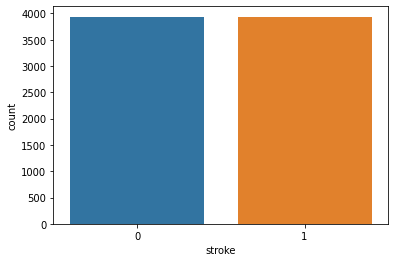

In [70]:
sns.countplot(Y_res)

In [71]:
# create the model
stroke_clf_tree = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
# ValueError: could not convert string to float: 'nontypical'
# fit the model
stroke_clf_tree = stroke_clf_tree.fit(X_res, Y_res)

In [72]:
Y_res_tree = stroke_clf_tree.predict(X_res)

[[2993  945]
 [ 222 3716]]


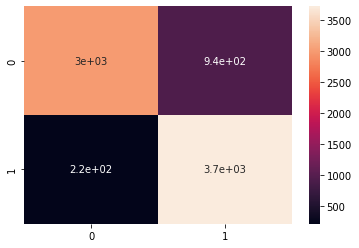

In [73]:
stroke_cm_train_tree_new = metrics.confusion_matrix(Y_res,Y_res_tree)
print(stroke_cm_train_tree_new)
sns.heatmap(stroke_cm_train_tree_new, annot=True)

In [74]:
stroke_acc_train_tree_new = metrics.accuracy_score(Y_res,Y_res_tree)
stroke_acc_train_tree_new

0.8518283392585069

In [75]:
df_stroke_train[Y_res!=Y_res_tree]

<ipython-input-75-259dfac8e4d9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_stroke_train[Y_res!=Y_res_tree]


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
3684,7.0,0,0,89.38,19.0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1688,32.0,0,0,80.80,44.8,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3717,13.0,0,0,63.22,18.5,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3805,50.0,0,1,68.09,35.5,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,53.0,0,0,81.51,28.5,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
3660,52.0,0,0,67.30,36.3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4030,9.0,0,0,84.17,17.4,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0
2782,44.0,0,0,81.13,34.1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [76]:
problematic_pred_train = df_stroke_train[Y_res!=Y_res_tree]
fitted_pred_train = df_stroke_train[Y_res==Y_res_tree]
problematic_pred_train

<ipython-input-76-961e739e88ab>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  problematic_pred_train = df_stroke_train[Y_res!=Y_res_tree]
<ipython-input-76-961e739e88ab>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fitted_pred_train = df_stroke_train[Y_res==Y_res_tree]


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
3684,7.0,0,0,89.38,19.0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1688,32.0,0,0,80.80,44.8,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3717,13.0,0,0,63.22,18.5,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3805,50.0,0,1,68.09,35.5,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,53.0,0,0,81.51,28.5,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
3660,52.0,0,0,67.30,36.3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4030,9.0,0,0,84.17,17.4,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0
2782,44.0,0,0,81.13,34.1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1


####Classificaton Accuracy score after applying SMOTE

In [77]:
print("Tree classification:\n%s" % metrics.classification_report(Y_res,Y_res_tree))

Tree classification:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      3938
           1       0.80      0.94      0.86      3938

    accuracy                           0.85      7876
   macro avg       0.86      0.85      0.85      7876
weighted avg       0.86      0.85      0.85      7876



<ipython-input-78-81d77c66eb9a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=df_stroke_train[Y_res==Y_res_tree], x="bmi")


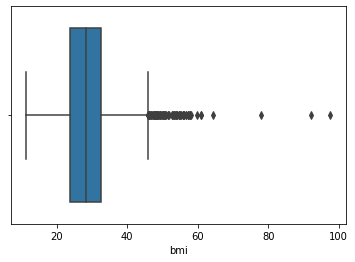

In [78]:
sns.boxplot(data=df_stroke_train[Y_res==Y_res_tree], x="bmi")

<ipython-input-79-945dd6dd31fc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=df_stroke_train[Y_res!=Y_res_tree], x="bmi")


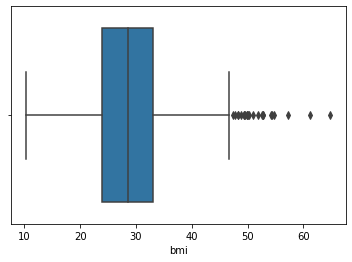

In [79]:
sns.boxplot(data=df_stroke_train[Y_res!=Y_res_tree], x="bmi")

##Pre-processing for validation set

In [80]:
df_stroke_validate = df_stroke_validate.drop("id",axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


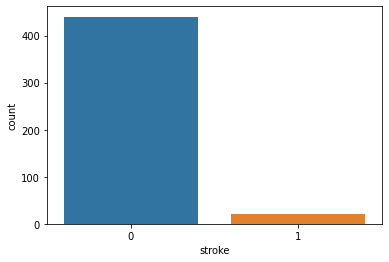

In [81]:
sns.countplot(df_stroke_validate['stroke'])

####Encoding of nominal/categorical features

In [82]:
def create_dummies(df, column_name,drop_first=False):
  # Get the binary encodings for the columns
  temp_dummies = pd.get_dummies(df[column_name],drop_first=drop_first)
  temp_df = df.drop(labels=[column_name], axis='columns')
  return temp_df.join(temp_dummies)

In [83]:
df_stroke_validate = create_dummies(df_stroke_validate, 'gender')

In [84]:
df_stroke_validate = create_dummies(df_stroke_validate, 'work_type')

In [85]:
df_stroke_validate = create_dummies(df_stroke_validate, 'Residence_type')

In [86]:
df_stroke_validate = create_dummies(df_stroke_validate, 'smoking_status')

In [87]:
df_stroke_validate = create_dummies(df_stroke_validate, 'ever_married')

In [88]:
df_stroke_validate

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4853,14.0,0,0,101.60,25.3,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2676,58.0,0,0,199.42,29.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4269,31.0,0,0,77.95,25.1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4264,65.0,0,0,66.69,21.5,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4265,40.0,0,0,122.23,30.5,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,78.0,0,0,67.29,24.6,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2767,27.0,0,0,94.19,27.4,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1321,30.0,0,0,82.56,25.4,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3402,8.0,0,0,104.30,18.5,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0


####Dealing with Missing Data in the Validation set

In [89]:
df_stroke_validate.isna().sum()

age                   0
hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                  14
stroke                0
Female                0
Male                  0
Govt_job              0
Never_worked          0
Private               0
Self-employed         0
children              0
Rural                 0
Urban                 0
Unknown               0
formerly smoked       0
never smoked          0
smokes                0
No                    0
Yes                   0
dtype: int64

####Imputation for missing values

In [90]:
df_stroke_validate['bmi'], bmi_imputer = impute_attribute(df_stroke_validate,'bmi')
df_stroke_validate

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4853,14.0,0,0,101.60,25.3,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2676,58.0,0,0,199.42,29.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4269,31.0,0,0,77.95,25.1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4264,65.0,0,0,66.69,21.5,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4265,40.0,0,0,122.23,30.5,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,78.0,0,0,67.29,24.6,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2767,27.0,0,0,94.19,27.4,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1321,30.0,0,0,82.56,25.4,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3402,8.0,0,0,104.30,18.5,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0


In [91]:
df_stroke_validate.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Female               0
Male                 0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
No                   0
Yes                  0
dtype: int64

##Model Validation

In [92]:
# Our features
stroke_X_validate = df_stroke_validate.drop(labels=["stroke"], axis=1)
# Our target
stroke_Y_validate= df_stroke_validate["stroke"]
stroke_X_validate

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4853,14.0,0,0,101.60,25.3,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2676,58.0,0,0,199.42,29.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4269,31.0,0,0,77.95,25.1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4264,65.0,0,0,66.69,21.5,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4265,40.0,0,0,122.23,30.5,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,78.0,0,0,67.29,24.6,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2767,27.0,0,0,94.19,27.4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1321,30.0,0,0,82.56,25.4,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3402,8.0,0,0,104.30,18.5,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0


In [93]:
df_stroke_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 4853 to 4574
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                460 non-null    float64
 1   hypertension       460 non-null    int64  
 2   heart_disease      460 non-null    int64  
 3   avg_glucose_level  460 non-null    float64
 4   bmi                460 non-null    float64
 5   stroke             460 non-null    int64  
 6   Female             460 non-null    uint8  
 7   Male               460 non-null    uint8  
 8   Govt_job           460 non-null    uint8  
 9   Never_worked       460 non-null    uint8  
 10  Private            460 non-null    uint8  
 11  Self-employed      460 non-null    uint8  
 12  children           460 non-null    uint8  
 13  Rural              460 non-null    uint8  
 14  Urban              460 non-null    uint8  
 15  Unknown            460 non-null    uint8  
 16  formerly smoked    460

##Model Evaluation

###Checking validation result

In [95]:
stroke_Y_validate_tree = stroke_clf_tree.predict(stroke_X_validate)

In [96]:
stroke_X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
1108,33.0,0,0,82.83,25.4,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [97]:
stroke_X_validate

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4853,14.0,0,0,101.60,25.3,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2676,58.0,0,0,199.42,29.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4269,31.0,0,0,77.95,25.1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4264,65.0,0,0,66.69,21.5,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4265,40.0,0,0,122.23,30.5,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,78.0,0,0,67.29,24.6,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2767,27.0,0,0,94.19,27.4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1321,30.0,0,0,82.56,25.4,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3402,8.0,0,0,104.30,18.5,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0


###Confusion Matrix

[[342  98]
 [  4  16]]


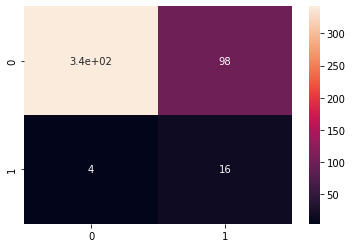

In [98]:
stroke_cm_validate_tree = metrics.confusion_matrix(stroke_Y_validate,stroke_Y_validate_tree)
print(stroke_cm_validate_tree)
sns.heatmap(stroke_cm_validate_tree, annot=True)

###Classification Accuracy Score

In [99]:
stroke_acc_validate_tree = metrics.accuracy_score(stroke_Y_validate,stroke_Y_validate_tree)
stroke_acc_validate_tree

0.7782608695652173

In [100]:
print("Tree classification:\n%s" % metrics.classification_report(stroke_Y_validate, stroke_Y_validate_tree))

Tree classification:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       440
           1       0.14      0.80      0.24        20

    accuracy                           0.78       460
   macro avg       0.56      0.79      0.55       460
weighted avg       0.95      0.78      0.84       460



##Pre-processing for testing


In [101]:
df_stroke_test = df_stroke_test.drop("id",axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


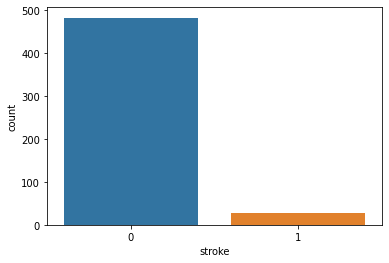

In [102]:
sns.countplot(df_stroke_test['stroke'])

####Encoding of nominal/categorical features

In [103]:
df_stroke_test = create_dummies(df_stroke_test, 'gender')

In [104]:
df_stroke_test = create_dummies(df_stroke_test, 'work_type')

In [105]:
df_stroke_test = create_dummies(df_stroke_test, 'Residence_type')

In [106]:
df_stroke_test = create_dummies(df_stroke_test, 'smoking_status')

In [107]:
df_stroke_test = create_dummies(df_stroke_test, 'ever_married')

In [108]:
df_stroke_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4688,31.0,0,0,64.85,23.0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4478,40.0,0,0,65.29,28.3,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
3849,8.0,0,0,74.42,22.5,0,1,0,0,0,...,0,1,0,1,1,0,0,0,1,0
4355,79.0,1,0,76.64,19.5,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3826,75.0,0,0,94.77,27.2,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1833,14.0,0,0,92.86,20.7,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
3411,26.0,0,0,88.79,24.9,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
350,79.0,1,1,200.28,30.0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1


In [109]:
stroke_X_test = df_stroke_test.drop(labels=['stroke'], axis=1)
stroke_Y_test = df_stroke_test['stroke']

In [110]:
stroke_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 4688 to 3413
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                511 non-null    float64
 1   hypertension       511 non-null    int64  
 2   heart_disease      511 non-null    int64  
 3   avg_glucose_level  511 non-null    float64
 4   bmi                488 non-null    float64
 5   Female             511 non-null    uint8  
 6   Male               511 non-null    uint8  
 7   Other              511 non-null    uint8  
 8   Govt_job           511 non-null    uint8  
 9   Private            511 non-null    uint8  
 10  Self-employed      511 non-null    uint8  
 11  children           511 non-null    uint8  
 12  Rural              511 non-null    uint8  
 13  Urban              511 non-null    uint8  
 14  Unknown            511 non-null    uint8  
 15  formerly smoked    511 non-null    uint8  
 16  never smoked       511

####Dealing with Missing Data in the Training set

In [111]:
stroke_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 4688 to 3413
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                511 non-null    float64
 1   hypertension       511 non-null    int64  
 2   heart_disease      511 non-null    int64  
 3   avg_glucose_level  511 non-null    float64
 4   bmi                488 non-null    float64
 5   Female             511 non-null    uint8  
 6   Male               511 non-null    uint8  
 7   Other              511 non-null    uint8  
 8   Govt_job           511 non-null    uint8  
 9   Private            511 non-null    uint8  
 10  Self-employed      511 non-null    uint8  
 11  children           511 non-null    uint8  
 12  Rural              511 non-null    uint8  
 13  Urban              511 non-null    uint8  
 14  Unknown            511 non-null    uint8  
 15  formerly smoked    511 non-null    uint8  
 16  never smoked       511

In [112]:
stroke_X_test.isna().sum()

age                   0
hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                  23
Female                0
Male                  0
Other                 0
Govt_job              0
Private               0
Self-employed         0
children              0
Rural                 0
Urban                 0
Unknown               0
formerly smoked       0
never smoked          0
smokes                0
No                    0
Yes                   0
dtype: int64

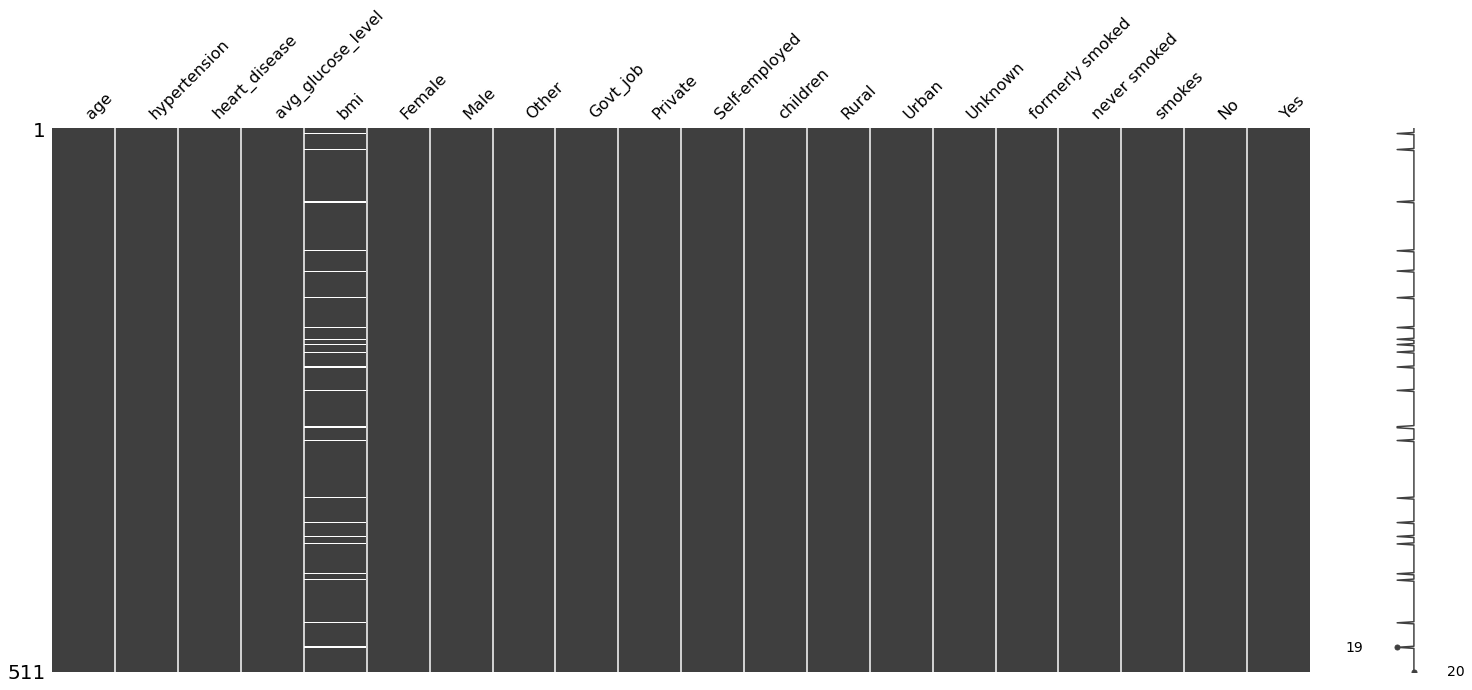

In [113]:
msno.matrix(stroke_X_test)

####Imputation for missing values

In [114]:
stroke_X_test ['bmi'], bmi_imputer = impute_attribute(df_stroke_test,'bmi') 
stroke_X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4688,31.0,0,0,64.85,23.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4478,40.0,0,0,65.29,28.3,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
3849,8.0,0,0,74.42,22.5,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
4355,79.0,1,0,76.64,19.5,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3826,75.0,0,0,94.77,27.2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,70.0,0,0,69.04,35.9,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1833,14.0,0,0,92.86,20.7,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
3411,26.0,0,0,88.79,24.9,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
350,79.0,1,1,200.28,30.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [115]:
stroke_X_test.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
Female               0
Male                 0
Other                0
Govt_job             0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
No                   0
Yes                  0
dtype: int64

##Model Testing

In [116]:
# Our features
stroke_X_test = df_stroke_test.drop(labels=["stroke"], axis=1)
# Our target
stroke_Y_test = df_stroke_test["stroke"]
stroke_X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4688,31.0,0,0,64.85,23.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4478,40.0,0,0,65.29,28.3,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
3849,8.0,0,0,74.42,22.5,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
4355,79.0,1,0,76.64,19.5,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3826,75.0,0,0,94.77,27.2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,70.0,0,0,69.04,35.9,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1833,14.0,0,0,92.86,20.7,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
3411,26.0,0,0,88.79,24.9,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
350,79.0,1,1,200.28,30.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [117]:
df_stroke_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 4688 to 3413
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                511 non-null    float64
 1   hypertension       511 non-null    int64  
 2   heart_disease      511 non-null    int64  
 3   avg_glucose_level  511 non-null    float64
 4   bmi                488 non-null    float64
 5   stroke             511 non-null    int64  
 6   Female             511 non-null    uint8  
 7   Male               511 non-null    uint8  
 8   Other              511 non-null    uint8  
 9   Govt_job           511 non-null    uint8  
 10  Private            511 non-null    uint8  
 11  Self-employed      511 non-null    uint8  
 12  children           511 non-null    uint8  
 13  Rural              511 non-null    uint8  
 14  Urban              511 non-null    uint8  
 15  Unknown            511 non-null    uint8  
 16  formerly smoked    511

##Model Evaluation

####Checking validation result

In [121]:
stroke_Y_test_tree = stroke_clf_tree.predict(stroke_X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Other
Feature names seen at fit time, yet now missing:
- Never_worked

  warnings.warn(message, FutureWarning)


####Confusion Matrix

[[329 154]
 [  5  23]]


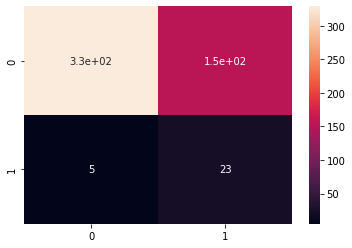

In [122]:
stroke_cm_test_tree = metrics.confusion_matrix(stroke_Y_test,stroke_Y_test_tree)
print(stroke_cm_test_tree)
sns.heatmap(stroke_cm_test_tree, annot=True)

####Classification Accuracy Score

In [123]:
stroke_acc_test_tree = metrics.accuracy_score(stroke_Y_test,stroke_Y_test_tree)
stroke_acc_test_tree

0.6888454011741683

In [124]:
print("Tree classification:\n%s" % metrics.classification_report(stroke_Y_test, stroke_Y_test_tree))

Tree classification:
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       483
           1       0.13      0.82      0.22        28

    accuracy                           0.69       511
   macro avg       0.56      0.75      0.51       511
weighted avg       0.94      0.69      0.77       511

